In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving heart_dataset.csv to heart_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv('heart_dataset.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

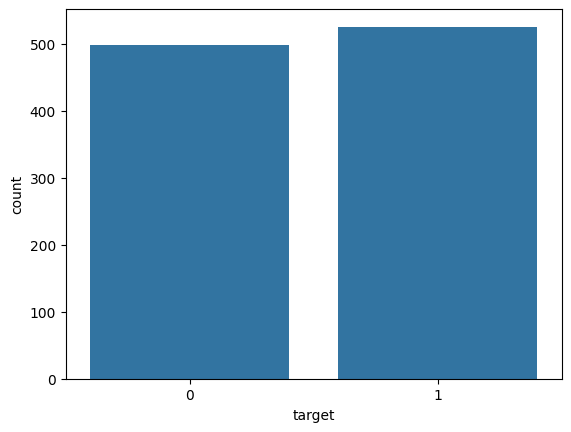

In [ ]:
sns.countplot(x='target', data=df)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
print("Predictions: ", len(y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Predictions:  205
Accuracy Score:  0.7951219512195122
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:  [[73 29]
 [13 90]]


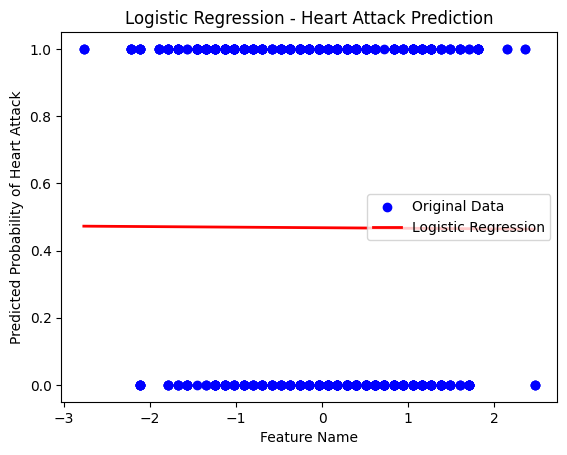

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_index = 0
X_range_single = np.linspace(
    X_train_scaled[:, feature_index].min(),
    X_train_scaled[:, feature_index].max(),
    100
)


X_range_full = np.tile(np.mean(X_train_scaled, axis=0), (100, 1))
X_range_full[:, feature_index] = X_range_single

y_prob = model.predict_proba(X_range_full)[:, 1]


plt.scatter(X_train_scaled[:, feature_index], y_train, color='blue', label='Original Data')
plt.plot(X_range_single, y_prob, color='red', linewidth=2, label='Logistic Regression')
plt.xlabel("Feature Name")
plt.ylabel("Predicted Probability of Heart Attack")
plt.title("Logistic Regression - Heart Attack Prediction")
plt.legend()
plt.show()


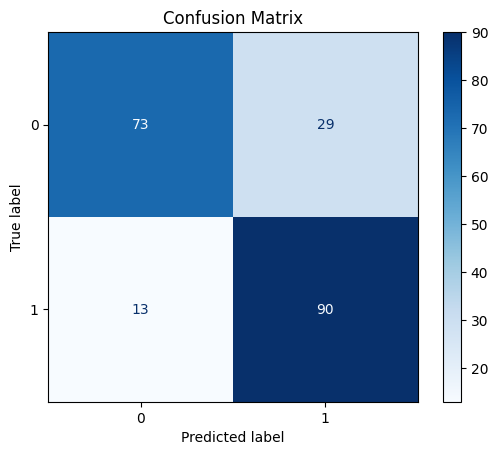

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()